In [175]:
import pandas as pd 
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt

In [2]:
customer = pd.read_csv(r'DataSetCaseStudy3/Customer Acqusition.csv')

In [3]:
repay = pd.read_csv(r'DataSetCaseStudy3/Repayment.csv')

In [4]:
repay.drop(['Unnamed: 4','SL No:'],axis=1,inplace=True)

In [5]:
repay.dropna(axis=0,inplace=True)

In [6]:
repay['Month']=repay['Month'].apply(lambda x:pd.to_datetime(x))

In [7]:
repay.head()

,Customer,Month,Amount
0,A1,2004-01-12,495414.75
1,A1,2004-01-03,245899.02
2,A1,2004-01-15,259490.06
3,A1,2004-01-25,437555.12
4,A1,2005-01-17,165972.88


In [8]:
spend = pd.read_csv(r'DataSetCaseStudy3/spend.csv')


In [9]:
spend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Sl No:    1500 non-null   int64  
 1   Customer  1500 non-null   object 
 2   Month     1500 non-null   object 
 3   Type      1500 non-null   object 
 4   Amount    1500 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 58.7+ KB


In [10]:
spend.drop('Sl No:',axis=1,inplace=True)

In [11]:
spend['Month']=spend['Month'].apply(lambda x:pd.to_datetime(x))

In [12]:
spend.head()

,Customer,Month,Type,Amount
0,A1,2004-01-12,JEWELLERY,485470.80
1,A1,2004-01-03,PETRO,410556.13
2,A1,2004-01-15,CLOTHES,23740.46
3,A1,2004-01-25,FOOD,484342.47
4,A1,2005-01-17,CAMERA,369694.07


In [13]:
spend.isnull().sum()

Customer    0
Month       0
Type        0
Amount      0
dtype: int64

In [14]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   No        100 non-null    int64  
 1   Customer  100 non-null    object 
 2   Age       100 non-null    int64  
 3   City      100 non-null    object 
 4   Product   100 non-null    object 
 5   Limit     100 non-null    float64
 6   Company   100 non-null    object 
 7   Segment   100 non-null    object 
dtypes: float64(1), int64(2), object(5)
memory usage: 6.4+ KB


In [15]:
customer.drop('No',axis=1,inplace=True)

In [16]:
customer.head()

,Customer,Age,City,Product,Limit,Company,Segment
0,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed
1,A2,71,CALCUTTA,Silver,100000.0,C2,Salaried_MNC
2,A3,34,COCHIN,Platimum,10000.0,C3,Salaried_Pvt
3,A4,47,BOMBAY,Platimum,10001.0,C4,Govt
4,A5,56,BANGALORE,Platimum,10002.0,C5,Normal Salary


## Q1 a) In case age is less than 18, replace it with mean of age values.

In [17]:
customer.Age.mean()

46.49

In [18]:
customer.loc[customer["Age"] < 18,"Age"] = customer["Age"].mean()

In [19]:
customer.Age.mean()

48.399399999999986

## b) In case spend amount is more than the limit, replace it with 50% of that customer’s limit. 
### (customer’s limit provided in acquisition table is the per transaction limit on his card)


In [60]:
Cust_Spend_Transaction = pd.merge(left=customer,right=spend,on='Customer')


In [61]:
Cust_Spend_Transaction.head()

,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.80
1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,PETRO,410556.13
2,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-15,CLOTHES,23740.46
3,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-25,FOOD,484342.47
4,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2005-01-17,CAMERA,369694.07


In [62]:
Cust_Spend_Transaction['Amount'] = np.where(Cust_Spend_Transaction.Amount > Cust_Spend_Transaction.Limit, Cust_Spend_Transaction.Limit/2, Cust_Spend_Transaction.Amount)

In [63]:
Cust_Spend_Transaction.head()

,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.80
1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,PETRO,410556.13
2,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-15,CLOTHES,23740.46
3,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-25,FOOD,484342.47
4,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2005-01-17,CAMERA,369694.07


In [64]:
Cust_Spend_Transaction[Cust_Spend_Transaction['Amount'] > Cust_Spend_Transaction['Limit']]

,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount


## c) Incase the repayment amount is more than the limit, replace the repayment with the  limit.

In [25]:
Cust_Repayment_Transaction = pd.merge(left=customer, right=repay,on='Customer')

In [26]:
Cust_Repayment_Transaction.head()

,Customer,Age,City,Product,Limit,Company,Segment,Month,Amount
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,495414.75
1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,245899.02
2,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-15,259490.06
3,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-25,437555.12
4,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2005-01-17,165972.88


In [27]:
Cust_Repayment_Transaction.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1500 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Customer  1500 non-null   object        
 1   Age       1500 non-null   float64       
 2   City      1500 non-null   object        
 3   Product   1500 non-null   object        
 4   Limit     1500 non-null   float64       
 5   Company   1500 non-null   object        
 6   Segment   1500 non-null   object        
 7   Month     1500 non-null   datetime64[ns]
 8   Amount    1500 non-null   float64       
dtypes: datetime64[ns](1), float64(3), object(5)
memory usage: 117.2+ KB


In [28]:
Cust_Repayment_Transaction['Amount']=np.where(Cust_Repayment_Transaction.Amount > Cust_Repayment_Transaction.Limit, Cust_Repayment_Transaction.Limit, Cust_Repayment_Transaction.Amount)

In [29]:
Cust_Repayment_Transaction.head()

,Customer,Age,City,Product,Limit,Company,Segment,Month,Amount
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,495414.75
1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,245899.02
2,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-15,259490.06
3,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-25,437555.12
4,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2005-01-17,165972.88


In [30]:
Cust_Repayment_Transaction[Cust_Repayment_Transaction['Amount'] > Cust_Repayment_Transaction['Limit']]

,Customer,Age,City,Product,Limit,Company,Segment,Month,Amount


## Q2. From the above dataset create the following summaries:
## a) How many distinct customers exist?

In [31]:
Cust_Spend_Transaction['Customer'].drop_duplicates().count()

100

In [32]:
Cust_Repayment_Transaction['Customer'].drop_duplicates().count()

100

## b) How many distinct categories exist?

In [33]:
Cust_Spend_Transaction['Product'].drop_duplicates()

0         Gold
18      Silver
29    Platimum
Name: Product, dtype: object

In [34]:
Cust_Repayment_Transaction['Product'].drop_duplicates()

0         Gold
18      Silver
29    Platimum
Name: Product, dtype: object

## c) What is the average monthly spend by customers?

In [35]:
Cust_Spend_Amount=Cust_Spend_Transaction.groupby(['Customer','Month'])[['Amount']].mean().reset_index()

In [36]:
Cust_Spend_Amount['Spend_Month']=Cust_Spend_Amount['Month'].apply(lambda x:x.month)

In [37]:
AvgMonthlySpend=Cust_Spend_Amount.groupby(['Customer','Spend_Month'])[['Amount']].mean().reset_index()

In [38]:
AvgMonthlySpend

,Customer,Spend_Month,Amount
0,A1,1,341332.87700
1,A1,2,138421.15125
2,A1,4,261649.25000
3,A1,5,361141.31000
4,A1,8,344372.10000
...,...,...,...
573,A95,1,240401.50000
574,A96,1,54729.66000
575,A97,1,5000.00000
576,A98,1,5000.50000


## d) What is the average monthly repayment by customers?

In [39]:
Cust_Repayment_Amount = Cust_Repayment_Transaction.groupby(['Customer','Month'])[['Amount']].mean().reset_index()

In [40]:
Cust_Repayment_Amount['Repayment_Month']=Cust_Repayment_Amount['Month'].apply(lambda x:x.month)

In [41]:
AvgMonthlyRepayment = Cust_Repayment_Amount.groupby(['Customer','Repayment_Month'])[['Amount']].mean().reset_index()

In [42]:
AvgMonthlyRepayment

,Customer,Repayment_Month,Amount
0,A1,1,325723.331
1,A1,2,137713.785
2,A1,4,254474.580
3,A1,7,297176.740
4,A1,9,186427.500
...,...,...,...
553,A95,1,369405.960
554,A96,1,100000.000
555,A97,1,10000.000
556,A98,1,10001.000


## e) If the monthly rate of interest is 2.9%, what is the profit for the bank for each month? 
### (Profit is defined as interest earned on Monthly Profit. Monthly Profit = Monthly repayment – Monthly spend. Interest is earned only on positive profits and not on negative amounts)


In [43]:
AvgMonthlyCustomers = pd.merge(left = AvgMonthlySpend, right = AvgMonthlyRepayment, left_on=['Customer','Spend_Month'], right_on=['Customer','Repayment_Month'])

In [44]:
AvgMonthlyCustomers['Monthly_Profit'] = AvgMonthlyCustomers.Amount_y-AvgMonthlyCustomers.Amount_x

In [45]:
AvgMonthlyCustomers['Profit']=np.where(AvgMonthlyCustomers['Monthly_Profit']>0,AvgMonthlyCustomers['Monthly_Profit']*2.9/100,np.nan)

In [46]:
AvgMonthlyCustomers

,Customer,Spend_Month,Amount_x,Repayment_Month,Amount_y,Monthly_Profit,Profit
0,A1,1,341332.87700,1,325723.331000,-15609.546000,NaN
1,A1,2,138421.15125,2,137713.785000,-707.366250,NaN
2,A1,4,261649.25000,4,254474.580000,-7174.670000,NaN
3,A1,11,183839.61000,11,285729.090000,101889.480000,2954.794920
4,A10,1,173828.28250,1,283324.721667,109496.439167,3175.396736
...,...,...,...,...,...,...,...
449,A95,1,240401.50000,1,369405.960000,129004.460000,3741.129340
450,A96,1,54729.66000,1,100000.000000,45270.340000,1312.839860
451,A97,1,5000.00000,1,10000.000000,5000.000000,145.000000
452,A98,1,5000.50000,1,10001.000000,5000.500000,145.014500


### f) What are the top 5 product types? 

In [56]:
Cust_Spend_Transaction.groupby('Type').Amount.sum().reset_index().sort_values('Amount',ascending=False)

,Type,Amount
10,PETRO,28597384.98
4,CAMERA,27690738.44
7,FOOD,20519243.60
0,AIR TICKET,20155847.12
14,TRAIN TICKET,19995825.72
13,SHOPPING,17106660.97
3,BUS TICKET,16279935.35
9,MOVIE TICKET,13001899.29
6,CLOTHES,12302511.36
11,RENTAL,11850628.72


In [57]:
Cust_Spend_Transaction.head()

,Type,Amount
10,PETRO,28597384.98
4,CAMERA,27690738.44
7,FOOD,20519243.60
0,AIR TICKET,20155847.12
14,TRAIN TICKET,19995825.72


### g) Which city is having maximum spend?

In [65]:
Cust_Spend_Transaction

,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.80
1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,PETRO,410556.13
2,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-15,CLOTHES,23740.46
3,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-25,FOOD,484342.47
4,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2005-01-17,CAMERA,369694.07
...,...,...,...,...,...,...,...,...,...,...
1495,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,2004-01-25,BIKE,54729.66
1496,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,2004-01-12,AUTO,5000.00
1497,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,2004-01-03,SHOPPING,5000.50
1498,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed,2004-01-15,AIR TICKET,5001.00


In [67]:
Cust_Spend_Transaction.groupby('City').Amount.sum().reset_index().sort_values('Amount',ascending=False)

,City,Amount
4,COCHIN,45963513.50
2,CALCUTTA,41108132.30
0,BANGALORE,40461647.02
1,BOMBAY,28603127.38
3,CHENNAI,22128635.65
7,TRIVANDRUM,15337155.87
6,PATNA,15260586.97
5,DELHI,10918286.54


###  h)  Which age group is spending more money?

In [73]:
Cust_Spend_Transaction['Age_Group'] = np.where(((Cust_Spend_Transaction.Age.astype(int) >= 18) & (Cust_Spend_Transaction.Age.astype(int) < 25)), 'Youth',np.where(((Cust_Spend_Transaction.Age.astype(int) >= 25) & (Cust_Spend_Transaction.Age.astype(int) < 65)), 'Adult','Senior'))

In [71]:
Cust_Spend_Transaction.groupby('Age_Group').Amount.sum()

Age_Group
Adult     1.674181e+08
Senior    3.768249e+07
Youth     1.468050e+07
Name: Amount, dtype: float64

### i) Who are the top 10 customers in terms of repayment?

In [78]:
Cust_Repayment_Transaction.groupby('Customer').Amount.sum().reset_index().sort_values('Amount',ascending=False).head(10)

,Customer,Amount
58,A61,10539142.91
57,A60,9876290.74
5,A13,9572000.66
38,A43,8489871.46
40,A45,8448334.87
4,A12,8334760.16
6,A14,7943268.63
39,A44,7744730.12
33,A39,7622483.30
37,A42,7615460.86


### 3) Calculate the city wise spend on each product on yearly basis. Also include a graphical representation for the same.

In [83]:
Cust_Spend_Transaction['Year'] = Cust_Spend_Transaction['Month'].apply(lambda x:x.year)

In [84]:
city_wise_spend = pd.pivot_table(data =Cust_Spend_Transaction ,index=["City","Year"],columns='Product',aggfunc="sum",values="Amount")

In [85]:
city_wise_spend

Product                 Gold    Platimum      Silver
City       Year                                     
BANGALORE  2004   9289878.54  1112732.30  1291852.58
           2005  12892362.99   912284.97   830612.34
           2006  12030611.09   685831.27  1415480.94
BOMBAY     2004   6987853.53   897264.94   532089.03
           2005   8983018.28   711804.94   508988.54
           2006   7917144.31   972130.01  1092833.80
CALCUTTA   2004   7477140.98  2037690.30   500006.00
           2005  10303355.80  4434696.31   440147.06
           2006  11167532.77  3589606.66  1157956.42
CHENNAI    2004   1059618.50  3535652.38   282056.86
           2005   3740945.58  5053956.32   377184.49
           2006   2704288.62  5024923.40   350009.50
COCHIN     2004   7315850.15  3419904.07   814229.62
           2005  12110613.03  4960921.71   652269.38
           2006  10499142.38  4920592.29  1269990.87
DELHI      2004   2806495.00   283512.89   768172.30
           2005   1964845.27   494157.86   612311.21
           2006   2957103.32   176788.72   854899.97
PATNA      2004   2072567.90  1113069.60   756684.10
           2005   3252615.77  2883231.07   950094.19
           2006   2276181.69  1256137.65   700005.00
TRIVANDRUM 2004   2415102.84  2161676.67   209667.48
           2005   1240375.85  3601443.30   269912.99
           2006   2735710.87  2147403.75   555862.12

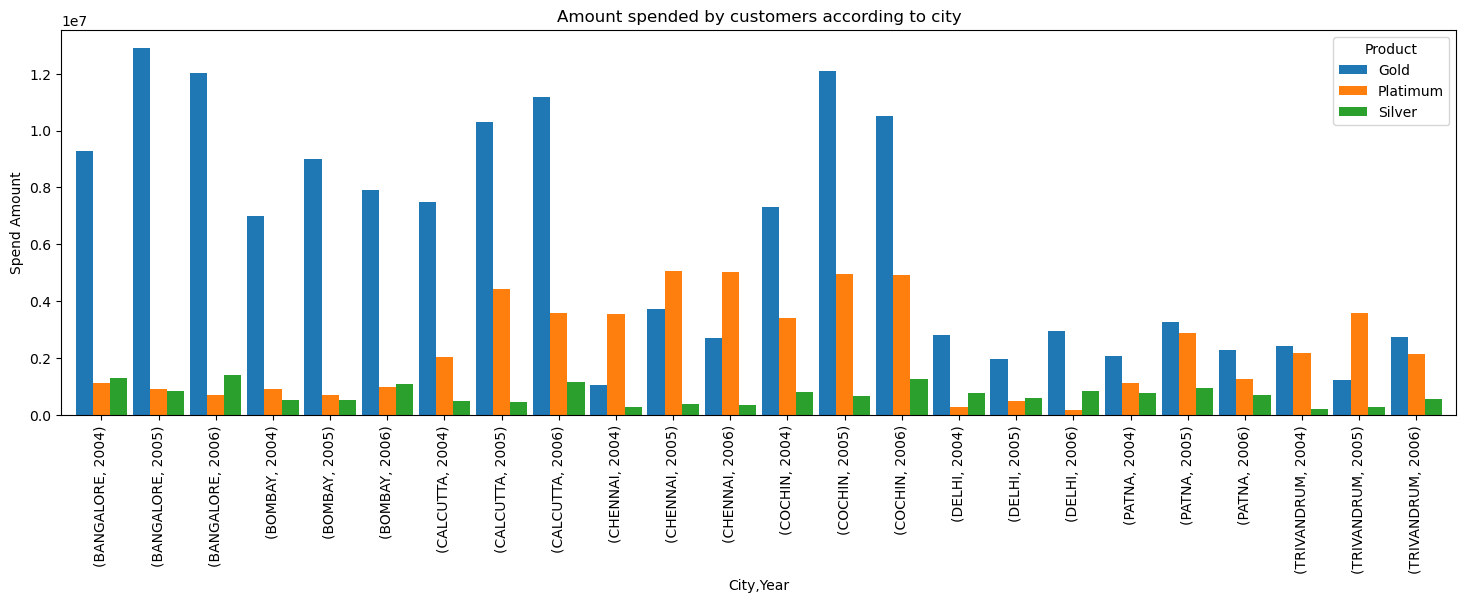

In [91]:
city_wise_spend.plot(kind="bar",figsize=(18,5),width=0.9)
plt.ylabel("Spend Amount")
plt.title("Amount spended by customers according to city")
plt.show()

## 4) Create graphs for
### a) Monthly comparison of total spends, city wise.

In [108]:
Cust_Spend_Transaction['Month']=Cust_Spend_Transaction.Month.apply(lambda x:x.month)

In [109]:
month_city = Cust_Spend_Transaction.groupby(['Month',"City"])[["Amount"]].sum().sort_index().reset_index()

In [110]:
month_city = pd.pivot_table(data=Cust_Spend_Transaction,values='Amount',index='City',columns='Month',aggfunc='sum')

In [111]:
month_city

Month,1,2,3,4,5,6,7,8,9,10,11,12
City,,,,,,,,,,,,
BANGALORE,9041796.84,6734494.76,5362903.07,4207980.48,6383115.13,1330685.90,2228217.69,695061.95,703018.28,1091602.61,2260603.07,422167.24
BOMBAY,5948993.33,4276988.30,5227850.50,1873785.01,3891945.60,1172594.97,177726.32,1066744.75,1278402.79,676005.70,2872049.40,140040.71
CALCUTTA,9064864.90,8150545.61,4939040.04,3457507.95,5578246.87,2293045.81,2234573.27,1548354.02,1511713.57,196357.83,2078880.93,55001.50
CHENNAI,4466961.36,4385815.95,3183643.71,2518656.99,2856199.62,1244242.16,693825.77,305875.97,745759.40,156247.17,1347779.28,223628.27
COCHIN,11714373.54,5747886.38,5645146.53,3882744.94,6581085.69,2495745.07,1290897.30,2317306.61,1382242.90,868551.89,3127999.60,909533.05
DELHI,2714261.45,1494064.06,2267149.02,777240.75,1600322.07,511276.09,50001.50,155402.16,50001.00,64615.46,391610.96,842342.02
PATNA,4916205.55,2353333.55,1437166.61,2338179.53,2136586.80,746186.13,50000.00,419383.64,70329.95,329537.34,413677.87,50000.00
TRIVANDRUM,3704336.99,2857123.89,2392316.51,1199293.45,2813534.48,400336.83,260484.50,453773.94,186063.70,285581.92,143387.40,640922.26


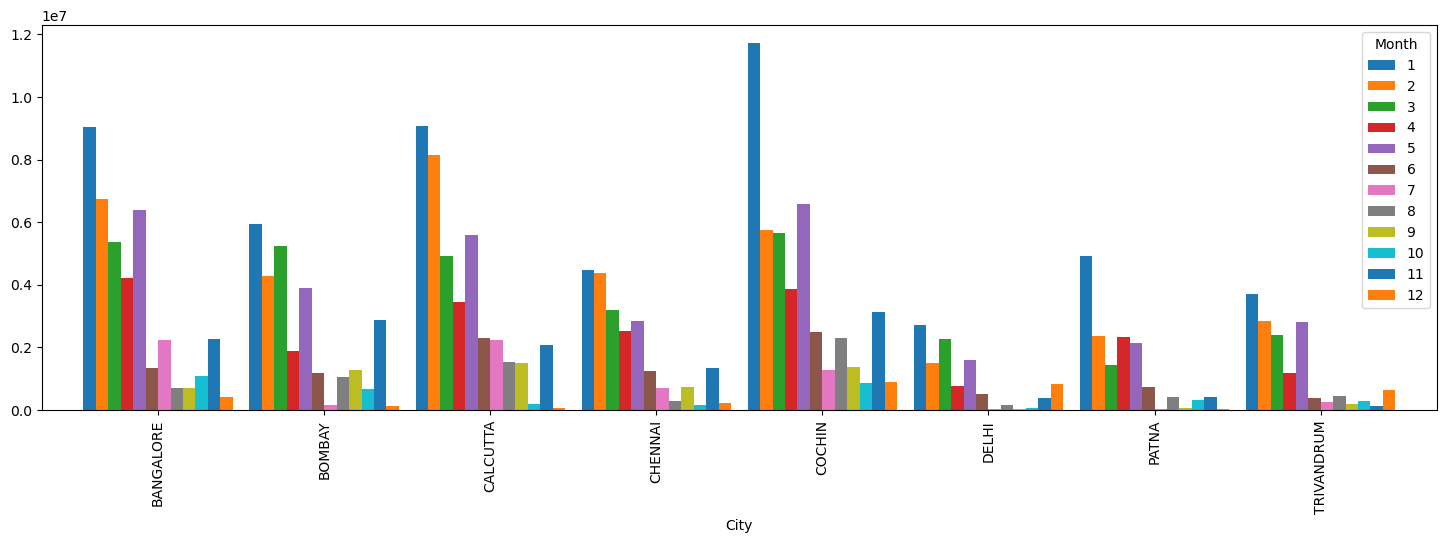

In [118]:
month_city.plot(kind='bar',figsize=(18,5),width=0.9)

plt.show()

### b) Comparison of yearly spend on air tickets.

In [125]:
air_tickets = Cust_Spend_Transaction.groupby(['Year','Type'])[['Amount']].sum().reset_index()

In [130]:
x = air_tickets.loc[air_tickets["Type"]=="AIR TICKET"]

In [131]:
x

,Year,Type,Amount
0,2004,AIR TICKET,4357225.35
15,2005,AIR TICKET,10550152.21
30,2006,AIR TICKET,5248469.56


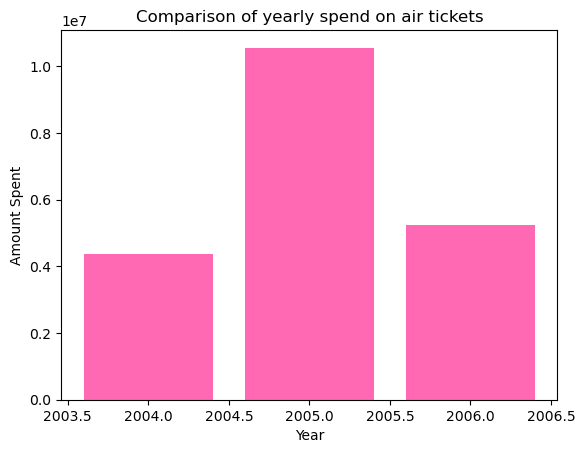

In [159]:
plt.bar(x['Year'],height=x['Amount'],color="hotpink")
plt.xlabel('Year')
plt.ylabel('Amount Spent')
plt.title('Comparison of yearly spend on air tickets')
plt.show()

### c. Comparison of monthly spend for each product (look for any seasonality that exists in terms of spend)

<AxesSubplot:xlabel='Monthly_Spend'>

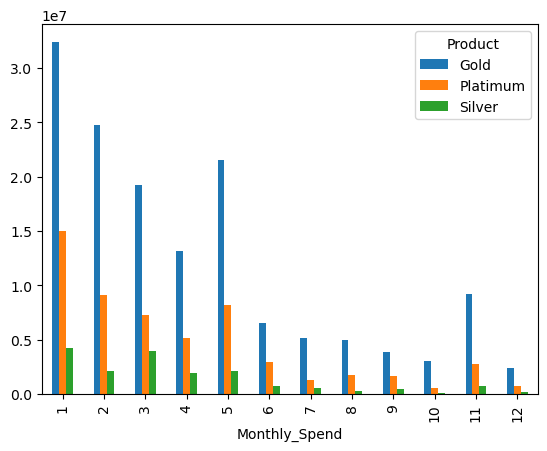

In [161]:
pd.pivot_table(data = Cust_Spend_Transaction, index = 'Monthly_Spend', columns='Product', 
               values='Amount', aggfunc='sum').plot(kind='bar')

## 5. Write user defined PYTHON function to perform the following analysis:
### You need to find top 10 customers for each city in terms of their repayment amount by different products and by different time periods i.e. year or month. The user should be able to specify the product (Gold/Silver/Platinum) and time period (yearly or monthly) and the function should automatically take these inputs while identifying the top 10 customers.

In [227]:
Cust_Repayment_Transaction['Yearly']=Cust_Repayment_Transaction.Month.apply(lambda x:x.year)
Cust_Repayment_Transaction['Month']=Cust_Repayment_Transaction.Month.apply(lambda x:x.month)

In [228]:
def top10Customers(product_category,time_period):
        return Cust_Repayment_Transaction.loc[(Cust_Repayment_Transaction.Product == product_category)].groupby(['Customer','City','Product',time_period]).Amount.sum().reset_index().sort_values('Amount',ascending=False).head(10)

In [229]:
product_category=str(input("Please Enter Product Category and product category should be in Gold/Silver/Platinum: "))
time_period=str(input("Please Enter Time Period and time period should be in Yearly/Month: "))


Please Enter Product Category and product category should be in Gold/Silver/Platinum: Silver
Please Enter Time Period and time period should be in Yearly/Month: Yearly


In [230]:
top10Customers_Analysis=top10Customers(product_category,time_period)

In [231]:
top10Customers_Analysis

,Customer,City,Product,Yearly,Amount
14,A24,DELHI,Silver,2005,1184870.98
8,A22,BOMBAY,Silver,2005,1141542.81
20,A46,PATNA,Silver,2005,1116730.89
18,A25,COCHIN,Silver,2006,1000030.00
11,A23,BANGALORE,Silver,2005,1000010.00
22,A57,TRIVANDRUM,Silver,2004,1000010.00
7,A22,BOMBAY,Silver,2004,953419.47
9,A22,BOMBAY,Silver,2006,945271.83
12,A23,BANGALORE,Silver,2006,872925.32
21,A46,PATNA,Silver,2006,839228.07
